# KNN Project 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.

# The Sonar Data

### Detecting a Rock or a Mine

Sonar (Sound navigation ranging) is a technique that uses sound propogation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.




The data set contains the response metrics for 60 saperate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).



Our main goal is to create amachine learning model capable of detecting the difference between a rock or a mine based on the responseof the 60 deparate sonar frequencies. 



### Complete the Tasks on bold

#### TASK: Run the cells below to load the data

### Imports

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [10]:
df = pd.read_csv('sonar.all-data.csv')

In [11]:
df.head()

,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,freq_10,...,freq_52,freq_53,freq_54,freq_55,freq_56,freq_57,freq_58,freq_59,freq_60,label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration 

#### TASK: Create a heatmap of the correlation between the difference frequency responses.

In [12]:
# CODE HERE

<AxesSubplot:>

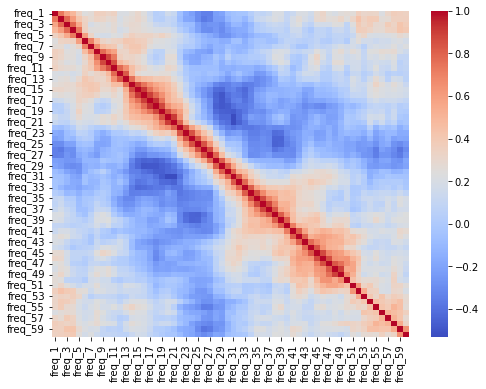

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')

#### TASK: What are the top 5 frequencies with the target\label?

_Note: You many need to map the labelto0s and 1s_

_Additional Note: We're looking for **absolute** correlation values_ .

In [14]:
df['Target'] = df['label'].map({'R':0,'M':1})

In [15]:
df.head()

,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,freq_10,...,freq_53,freq_54,freq_55,freq_56,freq_57,freq_58,freq_59,freq_60,label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [20]:
np.abs(df.corr()['Target']).sort_values().tail(6)

freq_45    0.339406
freq_10    0.341142
freq_49    0.351312
freq_12    0.392245
freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

#### TASK: Split the data into features and labels, and then split into a training set and tes set, with 90% for Cross-Validation, and 10% for final test set.

_Note: The solution uses a random_state=42_

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(['Target','label'],axis=1)

In [30]:
y = df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### TASK: Create a PipeLine that contains both a StandardScaaler and KNN model

In [32]:
# CODE HERE

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
scaler = StandardScaler()

In [36]:
knn = KNeighborsClassifier()

In [37]:
operations = [('Scaler',scaler),('knn',knn)]

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline(operations)

#### TASK: Perform a grid-search with pipeline to test various values of k and report back the best performance parameters.

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
k_values = list(range(1,30))

In [42]:
param_gird = {'knn__n_neighbors':k_values}

In [43]:
full_cv_classifier = GridSearchCV(pipe,param_gird,cv=5,scoring='accuracy')

In [44]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [45]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'Scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

#### TASK: Using the .cv_ results_ dictionary, see if you can create a plot of the mean test score per K value.

In [46]:
# CODE HERE

<AxesSubplot:>

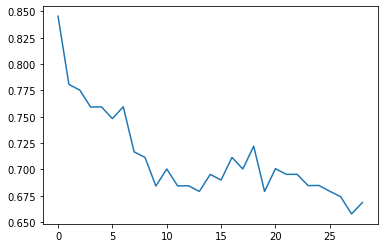

In [51]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()

## Final Model Evaluation

#### TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.

In [52]:
y_pred = full_cv_classifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
confusion_matrix(y_test,y_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



## Good Job!